# Reproduce The DR16 paper result 

## I will describe here the instructions to reproduce the DR16 results using Picca, which is a commonly used python package for the lyman-alpha analysis.


# Start with getting the correct version of Picca:
## The DR16 paper used the published version as the tags/v4, which is slightly different from the lastest master version.
## You can get the latest master version by simply using:

In [ ]:
git clone https://github.com/igmhub/picca.git

## Add to your bashrc:

In [ ]:
export PICCA_BASE='path to your picca'
pip install -r requirements.txt --user
python setup.py install --user

## To get the DR16 paper tags/v4 version, you can use:

In [ ]:
git checkout tags/v4 -b publish

## The next step is to create the delta fields. You can run it on the interactive node or submit the jobs on NERSC. To Start an interactive session at NERSC, for instance running:

In [ ]:
salloc -N 1 -C haswell -q interactive -t 04:00:00

## You need to use the quasar spectra and catalogs maintained by SDSS. They can be downloaded from the SDSS website, but they are already at NERSC.

In [ ]:
Setup variable pointing to the DR16 spectra catalog:
export EBOSS_v5_13_0='/global/cfs/cdirs/cosmo/data/sdss/dr16/eboss/spectro/redux/v5_13_0/'

Setup another variable pointing to the DR16 quasar catalog:
export DR16_Catalogs='/global/cfs/cdirs/desi/science/lya/eboss_dr16/original_dr16_analysis/Catalogs'

export Reproduce_dr16=<path to your reproduction directory>

## Now create the quasar catalogs at your own directory.

In [ ]:
cp -r $DR16_Catalogs $Reproduce_dr16/Catalogs
cd $Reproduce_dr16
mkdir Delta_calibration Delta_calibration/Delta Delta_calibration/Log/
mkdir Delta_calibration2 Delta_calibration2/Delta Delta_calibration2/Log/
mkdir Delta_LYA Delta_LYA/Delta Delta_LYA/Log/
mkdir Delta_LYB Delta_LYB/Delta Delta_LYB/Log/
mkdir Fits Correlations

## Run picca_delta.py function to generate the delta fields. They will be stored in the /Delta/ sub-directory, and you can find the process output at /Log/ sub-directory. You need to run picca_delta.py for 4 times one after another: 
### The first run will correct the calibration vector, using the MgII region:

In [ ]:
$PICCA_BASE/bin/picca_deltas.py --in-dir $EBOSS_v5_13_0/ --drq $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --out-dir $Reproduce_dr16/Delta/Delta_calibration/Delta/ --iter-out-prefix $Reproduce_dr16/Delta/Delta_calibration/Log/delta_attributes --log $Reproduce_dr16/Delta/Delta_calibration/Log/input.log --dust-map $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --rebin 3 --mode spplate --lambda-min 3600.0 --lambda-max 7235.0 --lambda-rest-min 2900.0 --lambda-rest-max 3120.0 --nit 20 --bi-max 0. --npix-min 50

### The second run will correct the variance also in the MgII region, using the results from the first run:

In [ ]:
$PICCA_BASE/bin/picca_deltas.py --in-dir $EBOSS_v5_13_0/ --drq $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --out-dir $Reproduce_dr16/Delta/Delta_calibration2/Delta/ --iter-out-prefix $Reproduce_dr16/Delta/Delta_calibration2/Log/delta_attributes --log $Reproduce_dr16/Delta/Delta_calibration2/Log/input.log --dust-map $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --flux-calib $Reproduce_dr16/Delta/Delta_calibration/Log/delta_attributes.fits.gz --mask-file $Reproduce_dr16/Catalogs/dr16-line-sky-mask.txt --rebin 3 --mode spplate --lambda-min 3600.0 --lambda-max 7235.0 --lambda-rest-min 2900.0 --lambda-rest-max 3120.0 --nit 20 --bi-max 0. --npix-min 50

### The third and fourth runs will actually compute the deltas in the Lya region and in the Lyb region:

In [ ]:
$PICCA_BASE/bin/picca_deltas.py --in-dir $EBOSS_v5_13_0/ --drq $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --out-dir $Reproduce_dr16/Delta/Delta_LYA/Delta/ --iter-out-prefix $Reproduce_dr16/Delta/Delta_LYA/Log/delta_attributes --log $Reproduce_dr16/Delta/Delta_LYA/Log/input.log --dust-map $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --flux-calib $Reproduce_dr16/Delta/Delta_LYA/Log/delta_attributes.fits.gz --ivar-calib $Reproduce_dr16/Delta/Delta_LYA/Log/delta_attributes.fits.gz --mask-file $Reproduce_dr16/Catalogs/dr16-line-sky-mask.txt --dla-vac $Reproduce_dr16/Catalogs/cat_for_DLA.fits --rebin 3 --mode spplate --lambda-min 3600.0 --lambda-max 7235.0 --lambda-rest-min 1040.0 --lambda-rest-max 1200.0 --nit 20 --bi-max 0. --vlss-max 1.0 --optical-depth 0.0023 3.64 LYA --npix-min 50

In [ ]:
$PICCA_BASE/bin/picca_deltas.py --in-dir $EBOSS_v5_13_0/--drq $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz--out-dir $Reproduce_dr16/Delta_LYB/Delta/ --iter-out-prefix $Reproduce_dr16/Delta_LYB/Log/delta_attributes --log $Reproduce_dr16/Delta_LYB/Log/input.log --dust-map $Reproduce_dr16/Catalogs/cat_for_clustering.fits.gz --flux-calib $Reproduce_dr16/Delta_calibration/Log/delta_attributes.fits.gz--ivar-calib $Reproduce_dr16/Delta_calibration2/Log/delta_attributes.fits.gz --mask-file $Reproduce_dr16/Catalogs/dr16-line-sky-mask.txt --dla-vac $Reproduce_dr16/Catalogs/cat_for_DLA.fits --rebin 3 --mode spplate --lambda-min 3600.0 --lambda-max 7235.0 --lambda-rest-min 920.0 --lambda-rest-max 1020.0 --nit 20--bi-max 0. --vlss-max 1.0 --optical-depth 0.0023 3.64 LYA 0.00043713769837498814 3.64 LYB 0.00016021175814990248 3.64 LY3 7.702653463648834e-05 3.64 LY4 4.310181661039068e-05 3.64 LY5 --npix-min 50

# Measuring the Lya auto-correlation
### Use the picca_cf.py function to compute the correlation function:

In [ ]:
$PICCA_BASE/bin/picca_cf.py --in-dir $Reproduce_dr16/Delta_LYA/Delta/ --out $Reproduce_dr16/Correlations/cf_z_all_data.fits --nproc 32 --fid-Om 0.3147 --fid-Or 0.0

### Use the picca_dmat.py function to get the distorsion matrix:

In [ ]:
$PICCA_BASE/bin/picca_dmat.py --in-dir $Reproduce_dr16/Delta_LYA/Delta/ --out $Reproduce_dr16/Correlations/dmat_z_all_data.fits --rej 0.99 --nproc 32 --fid-Om 0.3147 --fid-Or 0.0

### Use the picca_metal_dmat.py function to get the metal distorsion matrix:

In [ ]:
$PICCA_BASE/bin/picca_metal_dmat.py --in-dir $Reproduce_dr16/Delta_LYA/Delta/ --out $Reproduce_dr16/Correlations/metal_dmat_z_all_data.fits --nproc 32 --fid-Om 0.314569514863487 --fid-Or 7.97505418919554e-5 --rej 0.999 --abs-igm 'CIV(eff)' 'SiII(1260)' 'SiIII(1207)' 'SiII(1193)' 'SiII(1190)'

### Export the correlation function by using the distorsion matrix:

In [ ]:
$PICCA_BASE/bin/picca_export.py --data $Reproduce_dr16/Correlations/cf_z_all_data.fits --dmat $Reproduce_dr16/Correlations/dmat_z_all_data.fits --out $Reproduce_dr16/Correlations/cf_z_all_data-exp.fits.gz

### The Lya auto-correlation function is stored in cf_z_all_data-exp.fits.gz:

# BAO fitting
### Copy the example scripts to your directory:

In [ ]:
cp -r /global/cfs/cdirs/desi/science/lya/eboss_dr16/ting_reproduce_dr16/Scripts $Reproduce_dr16/Scripts

### Use the picca_fitter2.py function to do the correlation function fitting:

In [ ]:
$PICCA_BASE/bin/picca_fitter2.py $Reproduce_dr16/Scripts/chi2_L0_10.ini

# We can submit jobs on NERSC for the running. Here follows an example of the job submission 

In [ ]:
sbatch $Reproduce_dr16/Scripts/picca_deltas_calibration.batch
sbatch $Reproduce_dr16/Scripts/picca_deltas_calibration2.batch
sbatch $Reproduce_dr16/Scripts/picca_deltas_LYA.batch
sbatch $Reproduce_dr16/Scripts/cf_z.batch
sbatch $Reproduce_dr16/Scripts/dmat_z.batch
sbatch $Reproduce_dr16/Scripts/metal_dmat.batch
sbatch $Reproduce_dr16/Scripts/export.batch

# Result comparison
## Here you can find the example code for the comparison of delta fields and correlation function created by different versions of picca

In [3]:
from fitsio import FITS
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import numpy as np
import os
from matplotlib.pyplot import rcParams
import matplotlib._color_data as mcd
import math
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 12

In [7]:
delta_publish_dir = '/global/cscratch1/sd/tanting/Result_hcd/Delta/Delta_data_rebins_3_publish/Delta_LYA/Delta/delta-100.fits.gz'
delta_master_dir='/global/cscratch1/sd/tanting/Result_hcd/Delta/Delta_data_rebins_3_test/Delta_LYA/Delta/delta-100.fits.gz'
delta_dr16_dir = '/global/cfs/cdirs/desi/science/lya/eboss_dr16/original_dr16_analysis/Delta_LYA/Delta/delta-100.fits.gz'

delta_publish_file = FITS(delta_publish_dir)
delta_master_file = FITS(delta_master_dir)
delta_dr16_file = FITS(delta_dr16_dir)

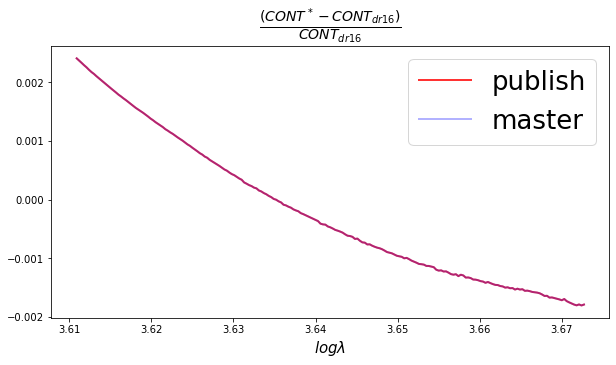

In [17]:
name = '458396011'
plt.figure()
plt.title(r'$\frac{(CONT^*-CONT_{dr16})}{CONT_{dr16}}$',fontsize = 20)
plt.plot(delta_publish_file[name]['LOGLAM'][:],(delta_publish_file[name]['CONT'][:] - delta_dr16_file[name]['CONT'][:])/delta_dr16_file[name]['CONT'][:],alpha = 0.8,color = 'red',label = 'publish')
plt.plot(delta_publish_file[name]['LOGLAM'][:],(delta_master_file[name]['CONT'][:] - delta_dr16_file[name]['CONT'][:])/delta_dr16_file[name]['CONT'][:],alpha = 0.3,color = 'blue',label = 'master')
plt.xlabel(r'$log\lambda$')
plt.legend(fontsize = 26)
plt.show()

## Compare the correlation function

In [4]:
def histo(x, cut=None, range=None, bins=50, alpha=1, clear=True, color='blue', xlab=None, text=None, datarange=None, grd=True):
        if cut is None:
                newx = x
        else:
                newx = x[cut]
        if xlab: plt.xlabel(xlab)
        lab = ' N: '+str(len(newx))+'\n mean: {0:.3g}'.format(np.mean(newx))+'\n rms: {0:.3g}'.format(np.std(newx))
        if text is not None: lab = text+'\n'+lab
        truc=plt.hist(newx, range=range, bins=bins, alpha=alpha, color=color, label=lab)
        plt.legend(loc='upper right')
        if grd: plt.grid()
        return np.array([len(newx), np.mean(newx), np.std(newx)])

In [5]:
dir_dr16 = '/global/cfs/cdirs/desi/science/lya/eboss_dr16/original_dr16_analysis/Correlations/cf_z_0_10-exp.fits.gz'
dir_andreu = '/global/cfs/cdirs/desi/science/lya/eboss_dr16/redo_Z_LyaMask/Correlations/cf_z_0_10-exp.fits.gz'

dir_master = '/global/cscratch1/sd/tanting/Result_hcd/Correlations/data_200_rebins_3_master/cf_z_all_data-exp.fits.gz'
dir_publish = '/global/cscratch1/sd/tanting/Result_hcd/Correlations/data_200_rebins_3_publish/cf_z_all_data-exp.fits.gz'

array([2.50000000e+03, 8.62209606e-04, 7.66098752e-02])

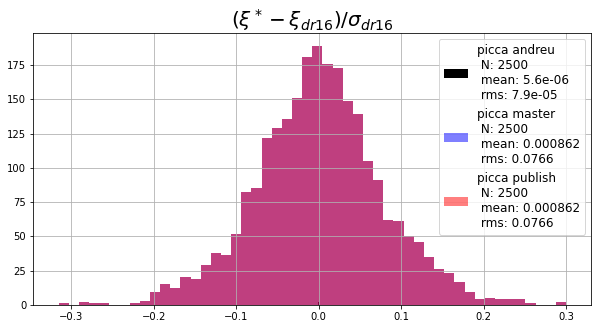

In [6]:
hdu_dr16=pyfits.open(dir_dr16)
hdu_master=pyfits.open(dir_master)
hdu_andreu=pyfits.open(dir_andreu)
hdu_publish=pyfits.open(dir_publish)
xi_dr16=hdu_dr16[1].data['DA']
xi_master=hdu_master[1].data['DA']
xi_andreu=hdu_andreu[1].data['DA']
xi_publish=hdu_publish[1].data['DA']
exi_dr16=np.sqrt(np.diag(hdu_dr16[1].data['CO']))
exi_master=np.sqrt(np.diag(hdu_master[1].data['CO']))
exi_andreu=np.sqrt(np.diag(hdu_andreu[1].data['CO']))
exi_publish=np.sqrt(np.diag(hdu_publish[1].data['CO']))
plt.title(r'$(\xi^*-\xi_{dr16})/\sigma_{dr16}$',fontsize = 20)
histo((xi_andreu-xi_dr16)/exi_dr16,color='black',text = 'picca andreu')
histo((xi_master-xi_dr16)/exi_dr16,color='blue',text = 'picca master',alpha = 0.5,clear = False)
histo((xi_publish-xi_dr16)/exi_dr16,color='red',text = 'picca publish',alpha = 0.5,clear = False)